In [30]:
import numpy as np

from astropy.io import fits
from astropy.table import Table

from vast.voidfinder.distance import z_to_comoving_dist
from vast.voidfinder.preprocessing import load_data_to_Table

from slice_plot_functions import pvfmine

In [3]:
filename = "/global/homes/s/schampat/Voids/Void_analysis/Data/Cosmos-deltatable.fits"
hdul=fits.open(filename)
data = Table(hdul[1].data)
data['ra'][0]

FileNotFoundError: [Errno 2] No such file or directory: '/global/homes/s/schampat/Voids/Void_analysis/Data/Cosmos-deltatable.fits'

In [31]:
filename = "/global/homes/s/schampat/Voids/Void_analysis/Data/deltatable.fits"
hdul = fits.open(filename)
datatable = Table(hdul[1].data)

datatable['Rgal']= z_to_comoving_dist(datatable['z'].astype(np.float32),0.26,1)

RAs = np.array([])
DECs = np.array([])
Deltas = np.array([])
Redshifts = np.array([])
Comoving = np.array([])

for m in range (len(datatable)):
    RAs = np.append(RAs,datatable['ra'][m])
    DECs = np.append(DECs,datatable['dec'][m])
    Deltas = np.append(Deltas,datatable['Delta'][m])
    Redshifts = np.append(Redshifts,datatable['z'][m])
    Comoving = np.append(Comoving,datatable['Rgal'][m])

In [41]:
col1 = fits.Column(name='ra', array=RAs, format="E")
col2 = fits.Column(name='dec', array=DECs, format="E")
col3 = fits.Column(name='z', array=Redshifts, format="E")
col4 = fits.Column(name='delta', array=Deltas, format="E")
col5 = fits.Column(name='comoving', array=Comoving, format="E")

cols = fits.ColDefs([col1,col2,col3,col4,col5])
hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto("/global/homes/s/schampat/Voids/Void_analysis/Data/Slice Plots/Comoving-deltas.fits", 
            overwrite=True)

In [4]:
filename = "/global/homes/s/schampat/Voids/Void_analysis/Data/Slice Plots/Comoving-deltas.fits"
hdul = fits.open(filename)
datatable = Table(hdul[1].data)
datatable

FileNotFoundError: [Errno 2] No such file or directory: '/global/homes/s/schampat/Voids/Void_analysis/Data/Slice Plots/Comoving-deltas.fits'

In [25]:
deltas = load_data_to_Table("/global/homes/s/schampat/Voids/Void_analysis/Data/Slice_Plots/Comoving-deltas.fits")
deltas

ra,dec,z,delta,comoving
float32,float32,float32,float32,float32
2.5950856,0.03995798,2.9162366,0.5633348,4576.8843
2.5950856,0.03995798,2.918943,-0.16900143,4578.8896
2.5950856,0.03995798,2.921651,0.680851,4580.894
2.5950856,0.03995798,2.9243608,1.1129243,4582.898
2.5950856,0.03995798,2.9270725,-0.09884469,4584.9014
2.5950856,0.03995798,2.9297862,0.29953516,4586.9033
2.5950856,0.03995798,2.9325018,-0.59169257,4588.906
2.5950856,0.03995798,2.9352193,0.11125143,4590.907
2.5950856,0.03995798,2.9379385,-0.8568085,4592.9077


In [26]:
quasars = load_data_to_Table("/global/homes/s/schampat/Voids/Void_analysis/Data/Slice_Plots/Quasars-old.fits")
quasars

ra,dec,z,comoving
float32,float32,float32,float32
2.5950856,0.03995798,3.577208,5014.4043
2.5953968,0.043061696,2.8750079,4546.0903
2.6006157,0.045104377,2.1048005,3869.383
2.5965052,0.0481664,2.7702327,4465.6816
2.6094496,0.050539482,2.860919,4535.46
2.6042798,0.052977987,3.296496,4840.517
2.6035767,0.04906695,2.2546446,4018.3489
2.6000605,0.049357306,2.4691103,4215.754
2.6092472,0.048566528,2.3779464,4133.982


In [27]:
holes = load_data_to_Table("/global/homes/s/schampat/Voids/Void_analysis/Data/Slice_Plots/deltatable1-Copy1._comoving_holes_noMagCut.txt")
holes

x,y,z,radius,flag
float64,float64,float64,float64,int64
4773.209074484103,198.37503235743551,42.64913121846885,42.32238433562759,0
4379.393264023859,192.85394454280998,45.21156069239764,40.82589146582112,1
4597.874692390677,214.1018659470442,43.61834705812676,38.540597970553875,2
3835.8284254037967,174.8892779721012,39.995720565223735,35.56580285694471,3
3842.4490879446244,175.19392575583527,39.799538656300996,35.36201045005942,3
4264.650163338491,176.92003892224798,35.48611967296935,35.31803041141272,4
3898.132057958494,162.31877025641217,36.23920574524079,35.30764836275638,5
3851.269104633594,175.5976149355048,39.74309624888672,35.295336223649485,3
3853.4725806028973,175.69897297045605,39.624650190260915,35.17438589058678,3


In [28]:
ra_range = np.array([2.58,2.66])

NameError: name 'mpl' is not defined

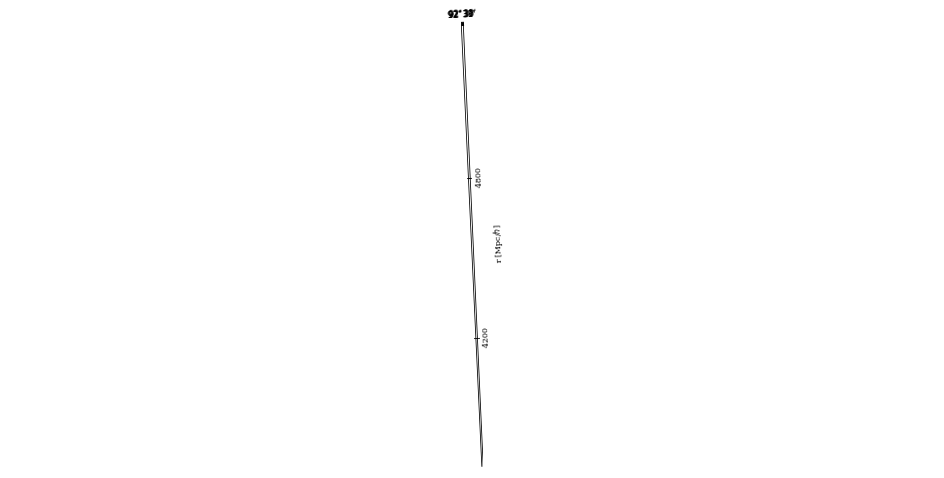

In [31]:
pvfmine(deltas, quasars, ra_range, 0.04, holes, 5, 100, 5, figure_file=None)